In [20]:
import os  
texts =  []
all_files = os.listdir("../M3")
for file in all_files:
    with open("../M3/"+file, 'r', encoding='utf8') as f:
        text = f.read()
        texts.append(text)
print(len(texts))

2


In [22]:
# build bag-of-words model

import sklearn.feature_extraction.text as text

vectorizer = text.CountVectorizer(max_features=100,
                                 token_pattern=r"(?u)\b\w+\b")

vectorizer.get_feature_names

<bound method CountVectorizer.get_feature_names of CountVectorizer(max_features=100, token_pattern='(?u)\\b\\w+\\b')>

In [23]:
v_documents = vectorizer.fit_transform(texts).toarray()
print(v_documents.shape)
print(vectorizer.get_feature_names()[:100])

(2, 100)
['af', 'al', 'alle', 'als', 'also', 'altoes', 'ane', 'bi', 'bouē', 'daer', 'dat', 'daʼ', 'de', 'den', 'des', 'dese', 'di', 'die', 'dies', 'diet', 'dij', 'dit', 'dits', 'drie', 'du', 'dē', 'dīc', 'dʼ', 'dꝫ', 'een', 'eest', 'elc', 'en', 'enē', 'es', 'geen', 'geest', 'geloeue', 'god', 'gode', 'godhᵗ', 'gods', 'heeft', 'hem', 'hen', 'hi', 'hier', 'hine', 'hoe', 'hē', 'iacob', 'ic', 'in', 'jn', 'mach', 'maʼ', 'mertē', 'met', 'mi', 'mij', 'moꝫ', 'mē', 'mēschᵗ', 'mꝫ', 'na', 'niet', 'no', 'noch', 'nu', 'nᵗ', 'ochte', 'oec', 'op', 'sal', 'si', 'sij', 'sijn', 'sin', 'sine', 'sinen', 'sinē', 'so', 'soe', 'sonder', 'sondʼ', 'sone', 'sōdʼ', 'te', 'vader', 'vadʼ', 'van', 'vā', 'was', 'wat', 'wel', 'wi', 'wt', 'wāt', 'ē', 'ī']


In [40]:
# normalize frequency counts according to L1

import numpy as np
import sklearn.preprocessing as preprocessing

v_documents = preprocessing.normalize(v_documents.astype(float), norm='l1')
print(v_documents.shape)

scaler = preprocessing.StandardScaler()
v_documents = scaler.fit_transform(v_documents)
print(v_documents.shape)

(2, 100)
(2, 100)


In [41]:
# calculate distances according to the Manhattan distance (cityblock)

import scipy.spatial.distance as distance
dm = distance.pdist(v_documents, 'cityblock')
print(distance.squareform(dm).shape)

(2, 2)


In [42]:
# create linnkage object

import scipy.cluster.hierarchy as hierarchy
linkage_object = hierarchy.linkage(dm, method='ward')

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

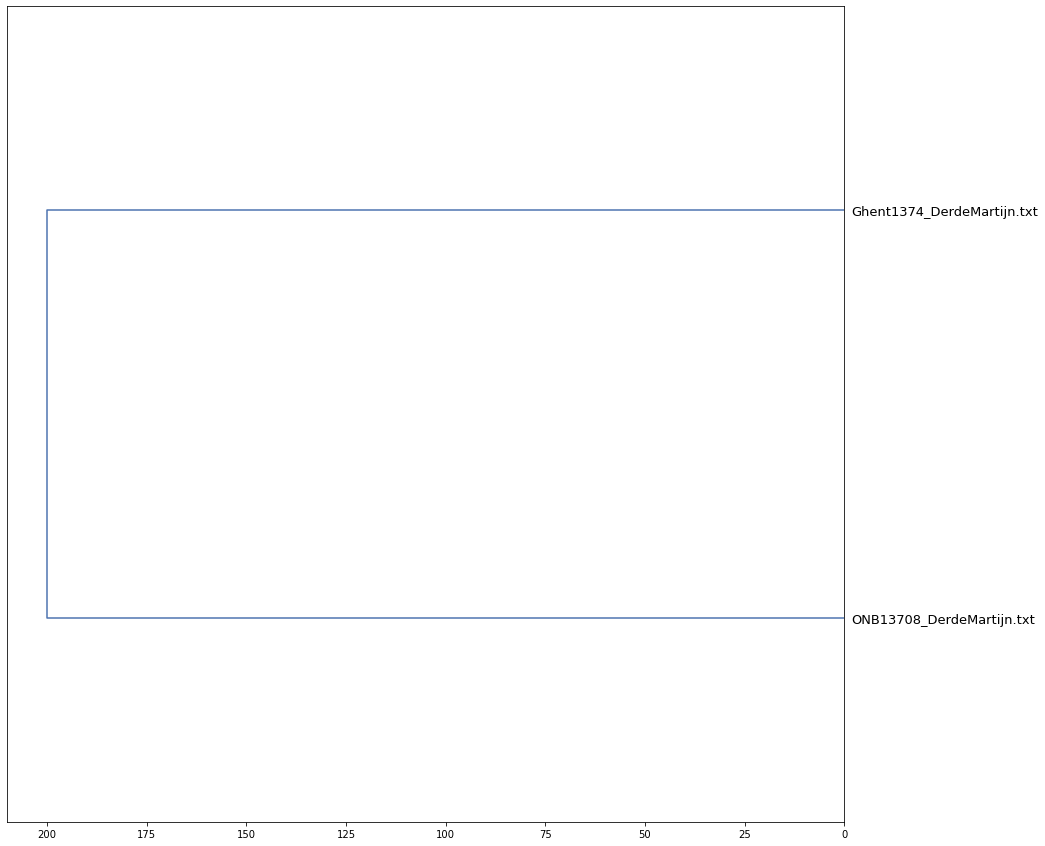

In [44]:
# plot figure

plt.figure(figsize=(15, 15))
names = ['_'.join((a)) for a in zip(all_files)]
d = hierarchy.dendrogram(linkage_object,
                        labels=names,
                        orientation='left', leaf_font_size=13)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('dendro max_df=1.0, max_features=2500, min_df=2.svg')

In [47]:
import pandas as pd
vocab = vectorizer.get_feature_names()
print(vocab)
corpus_dataframe = pd.DataFrame(v_documents, columns=vocab)


['af', 'al', 'alle', 'als', 'also', 'altoes', 'ane', 'bi', 'bouē', 'daer', 'dat', 'daʼ', 'de', 'den', 'des', 'dese', 'di', 'die', 'dies', 'diet', 'dij', 'dit', 'dits', 'drie', 'du', 'dē', 'dīc', 'dʼ', 'dꝫ', 'een', 'eest', 'elc', 'en', 'enē', 'es', 'geen', 'geest', 'geloeue', 'god', 'gode', 'godhᵗ', 'gods', 'heeft', 'hem', 'hen', 'hi', 'hier', 'hine', 'hoe', 'hē', 'iacob', 'ic', 'in', 'jn', 'mach', 'maʼ', 'mertē', 'met', 'mi', 'mij', 'moꝫ', 'mē', 'mēschᵗ', 'mꝫ', 'na', 'niet', 'no', 'noch', 'nu', 'nᵗ', 'ochte', 'oec', 'op', 'sal', 'si', 'sij', 'sijn', 'sin', 'sine', 'sinen', 'sinē', 'so', 'soe', 'sonder', 'sondʼ', 'sone', 'sōdʼ', 'te', 'vader', 'vadʼ', 'van', 'vā', 'was', 'wat', 'wel', 'wi', 'wt', 'wāt', 'ē', 'ī']


,af,al,alle,als,also,altoes,ane,bi,bouē,daer,...,van,vā,was,wat,wel,wi,wt,wāt,ē,ī
0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
1,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(corpus_dataframe))
word_count_matrix_ = (scaler.transform(v_documents))
word_count_matrix_

StandardScaler()


array([[ 1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
         1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,
        -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
         1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
         1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
         1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
        -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,
        -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,
        -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,
         1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
        -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1

In [56]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, manhattan_distances, cosine_distances
from sklearn.preprocessing import StandardScaler
from numpy import array

distance_metric = "cosine distances"
scaler = StandardScaler()

if distance_metric == "euclidian distance":
    similarity = euclidean_distances(word_count_matrix_)
elif distance_metric == "cosine similarity":
    similarity = cosine_similarity(word_count_matrix_)
elif distance_metric == "cosine distances":
    similarity = cosine_distances(word_count_matrix_)
elif distance_metric == "manhattan":
    similarity = manhattan_distances(word_count_matrix_)

print(similarity)
print(similarity.shape)

[[0. 2.]
 [2. 0.]]
(2, 2)


In [57]:
from scipy.cluster.hierarchy import ward, centroid, weighted, dendrogram
linkage_matrix = ward(similarity)

/Users/whaverals/opt/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

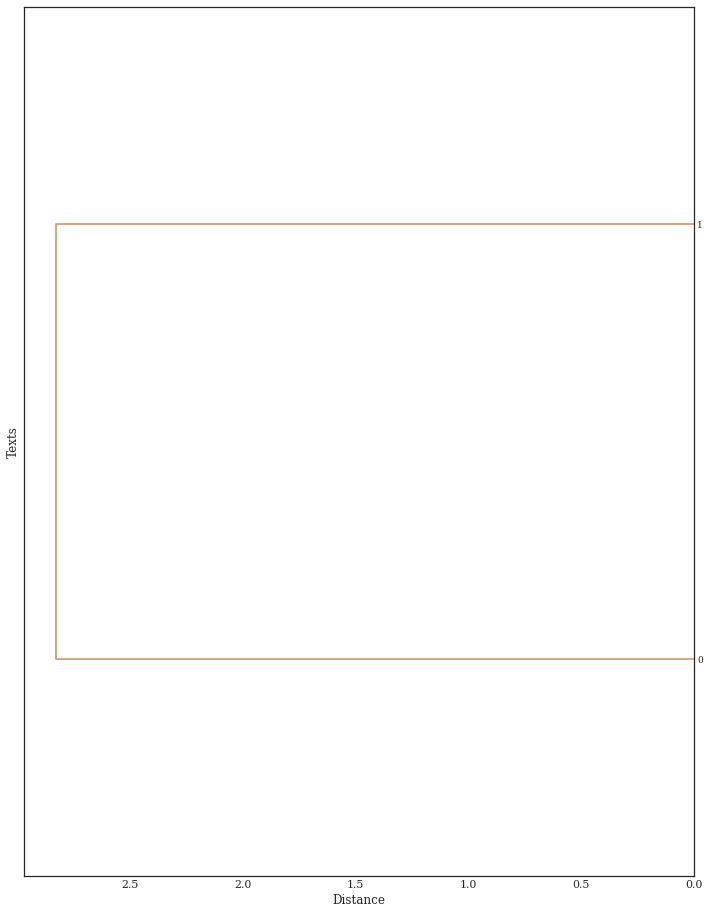

In [60]:
%matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
from textwrap import wrap

import seaborn as sns


%pylab inline
pylab.rcParams['figure.figsize']=(12,16)
sns.set()
plt.style.use('seaborn-white')

matplotlib.rc('font', family='serif')
    
# Make the Dendrogram
dendrogram(linkage_matrix, orientation="left", leaf_font_size=9, color_threshold=6)

# Add x and y axis labels
plt.xlabel("Distance")
plt.ylabel("Texts")
plt.xticks(rotation=0)



In [61]:
from sklearn.decomposition import PCA

In [62]:
# create the PCA object
pca = PCA(n_components = 2)

# analyze the dataset
my_pca = pca.fit(similarity).transform(similarity)

In [63]:
loadings = pca.components_

IndexError: index 2 is out of bounds for axis 1 with size 2

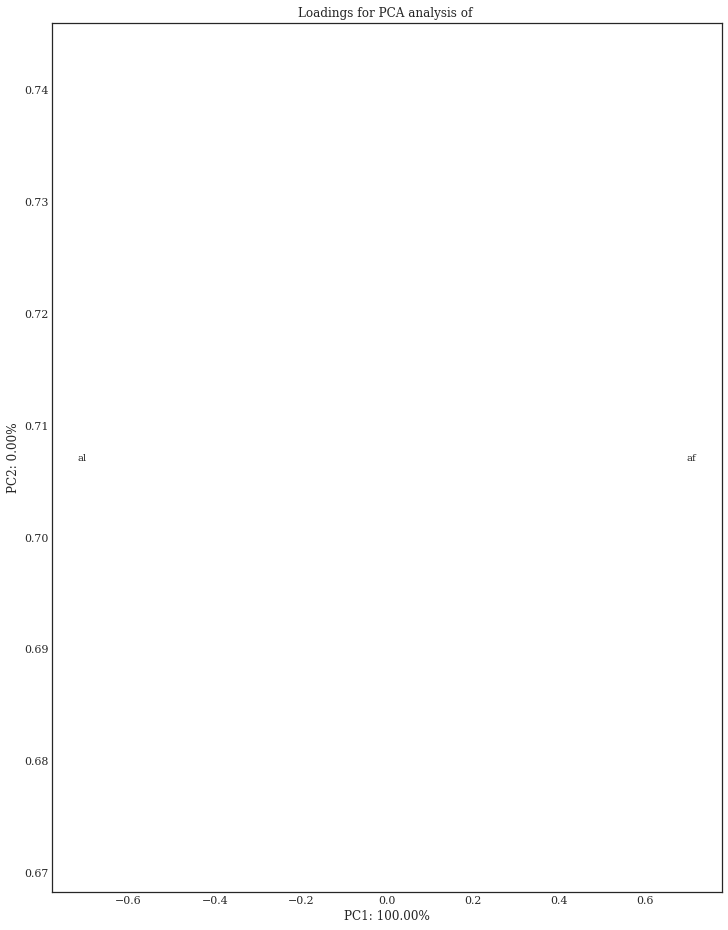

In [67]:
plt.scatter(loadings[0], loadings[1], alpha=0)

# Label and Title
plt.title("Principal Component Loadings")
plt.xlabel("PC1: " + "{0:.2f}".format(pca.explained_variance_ratio_[0] * 100)+"%")
plt.ylabel("PC2: " + "{0:.2f}".format(pca.explained_variance_ratio_[1] * 100)+"%")
plt.title(f'Loadings for PCA analysis of ')

# Iterate through the vocab and plot where it falls on loadings graph
# numpy array the loadings info is held in is in the opposite format of the
# pca information
for i, txt in enumerate(vocab):
    plt.annotate(txt, (loadings[0, i], loadings[1, i]), horizontalalignment='center',
                 verticalalignment='center', size=10)